# Dimension Reduction of weather data using PCA

## Import libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv('Seasonal_Weather_Data.csv')
df.head()

,ENV,STATE,CITY,PED,FAR,FC,HYB,YEAR,REP,prcp_May,...,temp_May,temp_Jun,temp_Jul,temp_Aug,temp_Sep,GDD_May,GDD_Jun,GDD_Jul,GDD_Aug,GDD_Sep
0,Ambriole2018,INDIANA,Tri-Lakes,17.461,Ambriole,AA,ORG1,2018,1,92.72,...,66.727806,71.7818,72.700032,72.67971,68.0906,505.746,638.622,688.14,696.591,528.156
1,Ambriole2018,INDIANA,Tri-Lakes,17.2B24,Ambriole,AA,ORG4,2018,1,92.72,...,66.727806,71.7818,72.700032,72.67971,68.0906,505.746,638.622,688.14,696.591,528.156
2,Ambriole2018,INDIANA,Tri-Lakes,461.2B24,Ambriole,AA,ORG2,2018,1,92.72,...,66.727806,71.7818,72.700032,72.67971,68.0906,505.746,638.622,688.14,696.591,528.156
3,Ambriole2018,INDIANA,Tri-Lakes,59R5,Ambriole,AA,CHECK1,2018,1,92.72,...,66.727806,71.7818,72.700032,72.67971,68.0906,505.746,638.622,688.14,696.591,528.156
4,Ambriole2018,INDIANA,Tri-Lakes,F34.A22,Ambriole,AA,KEV1,2018,1,92.72,...,66.727806,71.7818,72.700032,72.67971,68.0906,505.746,638.622,688.14,696.591,528.156


## Remove design variables

In [5]:
weather = df.iloc[:, 9:34].copy()
weather

,prcp_May,prcp_Jun,prcp_Jul,prcp_Aug,prcp_Sep,tmax_May,tmax_Jun,tmax_Jul,tmax_Aug,tmax_Sep,...,temp_May,temp_Jun,temp_Jul,temp_Aug,temp_Sep,GDD_May,GDD_Jun,GDD_Jul,GDD_Aug,GDD_Sep
0,92.72,143.68,115.54,206.17,45.72,79.159419,81.2672,82.954516,82.383161,78.1208,...,66.727806,71.7818,72.700032,72.67971,68.0906,505.746,638.622,688.140,696.591,528.156
1,92.72,143.68,115.54,206.17,45.72,79.159419,81.2672,82.954516,82.383161,78.1208,...,66.727806,71.7818,72.700032,72.67971,68.0906,505.746,638.622,688.140,696.591,528.156
2,92.72,143.68,115.54,206.17,45.72,79.159419,81.2672,82.954516,82.383161,78.1208,...,66.727806,71.7818,72.700032,72.67971,68.0906,505.746,638.622,688.140,696.591,528.156
3,92.72,143.68,115.54,206.17,45.72,79.159419,81.2672,82.954516,82.383161,78.1208,...,66.727806,71.7818,72.700032,72.67971,68.0906,505.746,638.622,688.140,696.591,528.156
4,92.72,143.68,115.54,206.17,45.72,79.159419,81.2672,82.954516,82.383161,78.1208,...,66.727806,71.7818,72.700032,72.67971,68.0906,505.746,638.622,688.140,696.591,528.156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,142.27,113.04,110.36,97.03,24.70,69.142129,84.4268,82.479548,85.064000,81.5240,...,59.730452,73.7771,73.540226,74.30029,68.7560,301.950,692.496,717.588,731.718,556.893
486,142.27,113.04,110.36,97.03,24.70,69.142129,84.4268,82.479548,85.064000,81.5240,...,59.730452,73.7771,73.540226,74.30029,68.7560,301.950,692.496,717.588,731.718,556.893
487,142.27,113.04,110.36,97.03,24.70,69.142129,84.4268,82.479548,85.064000,81.5240,...,59.730452,73.7771,73.540226,74.30029,68.7560,301.950,692.496,717.588,731.718,556.893
488,142.27,113.04,110.36,97.03,24.70,69.142129,84.4268,82.479548,85.064000,81.5240,...,59.730452,73.7771,73.540226,74.30029,68.7560,301.950,692.496,717.588,731.718,556.893


In [6]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
df_scaled = pd.DataFrame(scalar.fit_transform(
    weather), columns=weather.columns)
df_scaled

,prcp_May,prcp_Jun,prcp_Jul,prcp_Aug,prcp_Sep,tmax_May,tmax_Jun,tmax_Jul,tmax_Aug,tmax_Sep,...,temp_May,temp_Jun,temp_Jul,temp_Aug,temp_Sep,GDD_May,GDD_Jun,GDD_Jul,GDD_Aug,GDD_Sep
0,-0.879834,0.298039,0.214098,2.155422,-1.084381,1.185344,-0.021970,-1.136739,0.099834,0.310538,...,1.004611,0.313994,-1.192378,0.508312,0.517381,0.993310,0.304591,-1.288763,0.625010,0.478759
1,-0.879834,0.298039,0.214098,2.155422,-1.084381,1.185344,-0.021970,-1.136739,0.099834,0.310538,...,1.004611,0.313994,-1.192378,0.508312,0.517381,0.993310,0.304591,-1.288763,0.625010,0.478759
2,-0.879834,0.298039,0.214098,2.155422,-1.084381,1.185344,-0.021970,-1.136739,0.099834,0.310538,...,1.004611,0.313994,-1.192378,0.508312,0.517381,0.993310,0.304591,-1.288763,0.625010,0.478759
3,-0.879834,0.298039,0.214098,2.155422,-1.084381,1.185344,-0.021970,-1.136739,0.099834,0.310538,...,1.004611,0.313994,-1.192378,0.508312,0.517381,0.993310,0.304591,-1.288763,0.625010,0.478759
4,-0.879834,0.298039,0.214098,2.155422,-1.084381,1.185344,-0.021970,-1.136739,0.099834,0.310538,...,1.004611,0.313994,-1.192378,0.508312,0.517381,0.993310,0.304591,-1.288763,0.625010,0.478759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,0.022572,-0.494145,0.074032,0.066280,-1.346407,-0.457863,1.058343,-1.437154,1.435996,1.164506,...,-0.316356,1.031094,-0.681083,1.301087,0.702331,-0.300847,1.008428,-0.607441,1.236941,0.762485
486,0.022572,-0.494145,0.074032,0.066280,-1.346407,-0.457863,1.058343,-1.437154,1.435996,1.164506,...,-0.316356,1.031094,-0.681083,1.301087,0.702331,-0.300847,1.008428,-0.607441,1.236941,0.762485
487,0.022572,-0.494145,0.074032,0.066280,-1.346407,-0.457863,1.058343,-1.437154,1.435996,1.164506,...,-0.316356,1.031094,-0.681083,1.301087,0.702331,-0.300847,1.008428,-0.607441,1.236941,0.762485
488,0.022572,-0.494145,0.074032,0.066280,-1.346407,-0.457863,1.058343,-1.437154,1.435996,1.164506,...,-0.316356,1.031094,-0.681083,1.301087,0.702331,-0.300847,1.008428,-0.607441,1.236941,0.762485


## Conduct PCA

In [7]:
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df_scaled))
df_pca

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,2.459191,3.163692,0.014349,1.160965,-0.326204,0.087696,0.777955,-0.812652,-0.645019,0.049284,...,0.000260,-0.008838,0.006278,-0.001049,-0.001282,3.340624e-10,1.316582e-10,-8.089344e-12,1.508871e-14,1.997319e-15
1,2.459191,3.163692,0.014349,1.160965,-0.326204,0.087696,0.777955,-0.812652,-0.645019,0.049284,...,0.000260,-0.008838,0.006278,-0.001049,-0.001282,3.340276e-10,1.316595e-10,-8.056348e-12,-8.142870e-16,-2.758726e-15
2,2.459191,3.163692,0.014349,1.160965,-0.326204,0.087696,0.777955,-0.812652,-0.645019,0.049284,...,0.000260,-0.008838,0.006278,-0.001049,-0.001282,3.340454e-10,1.316521e-10,-8.055158e-12,-1.003911e-15,2.727505e-15
3,2.459191,3.163692,0.014349,1.160965,-0.326204,0.087696,0.777955,-0.812652,-0.645019,0.049284,...,0.000260,-0.008838,0.006278,-0.001049,-0.001282,3.340287e-10,1.316599e-10,-8.065358e-12,-2.592757e-15,1.484150e-15
4,2.459191,3.163692,0.014349,1.160965,-0.326204,0.087696,0.777955,-0.812652,-0.645019,0.049284,...,0.000260,-0.008838,0.006278,-0.001049,-0.001282,3.340439e-10,1.316436e-10,-8.061708e-12,2.723654e-15,-3.444905e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,2.738779,0.065091,-0.916911,0.412441,-0.221086,2.437173,1.607004,1.008631,-0.324317,-0.063880,...,0.043324,-0.018997,-0.011286,0.022003,-0.004724,-4.520399e-10,-1.156500e-09,-9.392453e-11,1.396703e-15,-7.331459e-16
486,2.738779,0.065091,-0.916911,0.412441,-0.221086,2.437173,1.607004,1.008631,-0.324317,-0.063880,...,0.043324,-0.018997,-0.011286,0.022003,-0.004724,-4.520399e-10,-1.156500e-09,-9.392453e-11,1.396703e-15,-7.331459e-16
487,2.738779,0.065091,-0.916911,0.412441,-0.221086,2.437173,1.607004,1.008631,-0.324317,-0.063880,...,0.043324,-0.018997,-0.011286,0.022003,-0.004724,-4.520399e-10,-1.156500e-09,-9.392453e-11,1.396703e-15,-7.331459e-16
488,2.738779,0.065091,-0.916911,0.412441,-0.221086,2.437173,1.607004,1.008631,-0.324317,-0.063880,...,0.043324,-0.018997,-0.011286,0.022003,-0.004724,-4.520399e-10,-1.156500e-09,-9.392453e-11,1.396703e-15,-7.331459e-16


Text(0, 0.5, 'Explained Varience')

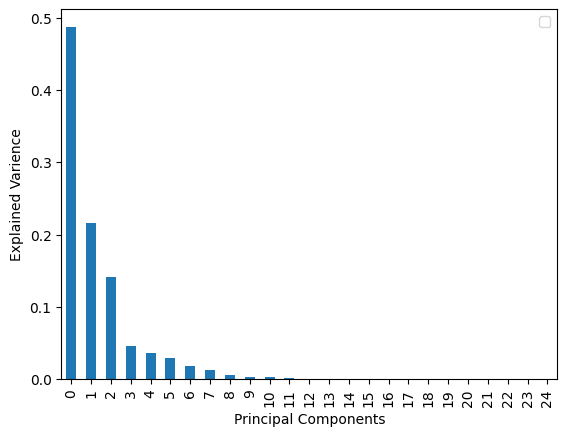

In [8]:
import matplotlib.pyplot as plt
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience')

## Export the scores

In [9]:
top_pc = df_pca.iloc[:, :4].copy()
top_pc.columns = ['WPC1', 'WPC2', 'WPC3', 'WPC4']
top_pc

,WPC1,WPC2,WPC3,WPC4
0,2.459191,3.163692,0.014349,1.160965
1,2.459191,3.163692,0.014349,1.160965
2,2.459191,3.163692,0.014349,1.160965
3,2.459191,3.163692,0.014349,1.160965
4,2.459191,3.163692,0.014349,1.160965
...,...,...,...,...
485,2.738779,0.065091,-0.916911,0.412441
486,2.738779,0.065091,-0.916911,0.412441
487,2.738779,0.065091,-0.916911,0.412441
488,2.738779,0.065091,-0.916911,0.412441


## Export

In [8]:
top_pc.to_csv('weatherscores.csv')

In [10]:
loadings_df = pd.DataFrame(pca.components_.T, columns=[
                           f'PC{i+1}' for i in range(pca.n_components_)], index=df_scaled.columns)

In [11]:
print("Loadings Matrix:")
print(loadings_df)

Loadings Matrix:
               PC1       PC2       PC3       PC4       PC5       PC6  \
prcp_May -0.119832 -0.116009  0.326243 -0.383736  0.112989  0.253533   
prcp_Jun  0.037554  0.246115  0.073427 -0.267013  0.663499  0.242310   
prcp_Jul -0.042353 -0.078437 -0.217056  0.587015  0.587437 -0.187712   
prcp_Aug  0.014251  0.337914  0.189920 -0.000479 -0.061197 -0.191455   
prcp_Sep -0.133723  0.109871  0.194477 -0.440447  0.233672 -0.544063   
tmax_May  0.246586  0.180479  0.021113  0.024256 -0.089278 -0.268174   
tmax_Jun  0.221499 -0.145526 -0.258325 -0.082353  0.024534 -0.054047   
tmax_Jul  0.000791 -0.384274  0.113746 -0.068863 -0.163477 -0.289742   
tmax_Aug  0.242509 -0.070194 -0.213491 -0.159586 -0.108282  0.163132   
tmax_Sep  0.224183 -0.038162  0.281227  0.205564 -0.055764  0.188488   
tmin_May  0.269409  0.099105  0.039340  0.007076  0.023814 -0.208053   
tmin_Jun  0.273714 -0.042803 -0.072770 -0.108726  0.112911 -0.040350   
tmin_Jul  0.043276 -0.405218  0.088532 -0.02644